Plants Classification By 3DHistogram feature + Random Forest Algorithm

              precision    recall  f1-score   support

      crocus       0.92      1.00      0.96        12
       daisy       0.88      0.93      0.90        15
       pansy       1.00      0.85      0.92        20
   sunflower       0.96      1.00      0.98        24

    accuracy                           0.94        71
   macro avg       0.94      0.95      0.94        71
weighted avg       0.95      0.94      0.94        71

dataset/images/image_crocus_0049.png
I think this flower is a CROCUS


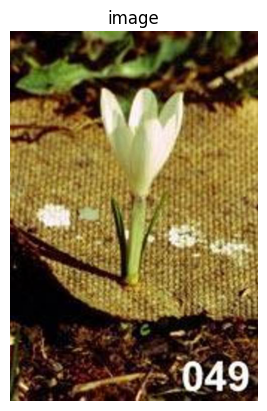

dataset/images/image_pansy_0184.png
I think this flower is a PANSY


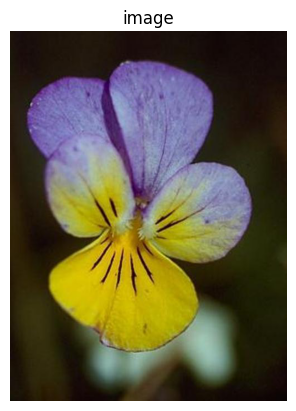

dataset/images/image_sunflower_0066.png
I think this flower is a SUNFLOWER


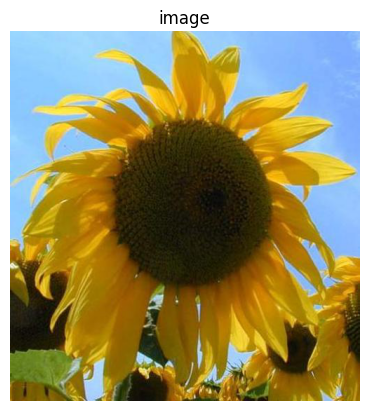

dataset/images/image_crocus_0003.png
I think this flower is a CROCUS


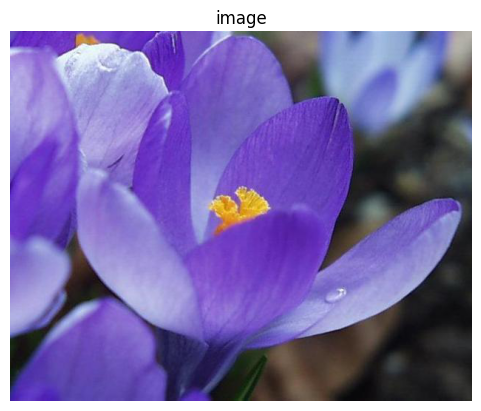

dataset/images/image_sunflower_0118.png
I think this flower is a SUNFLOWER


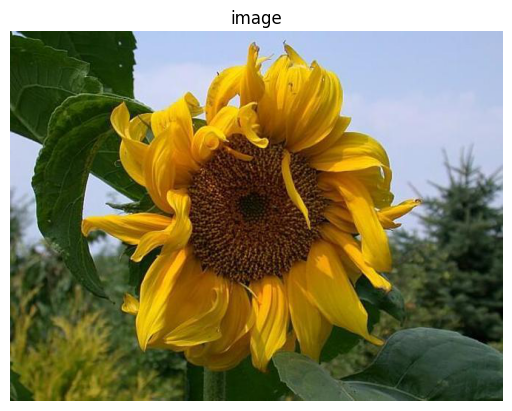

dataset/images/image_crocus_0037.png
I think this flower is a CROCUS


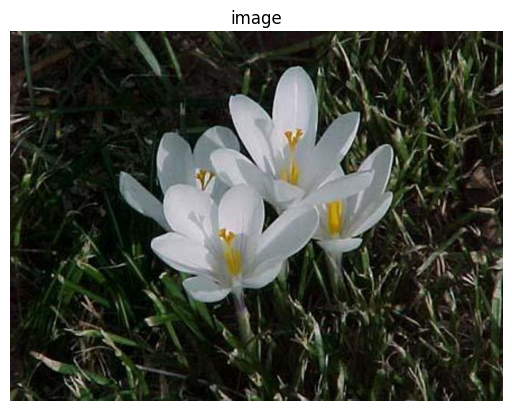

dataset/images/image_crocus_0032.png
I think this flower is a CROCUS


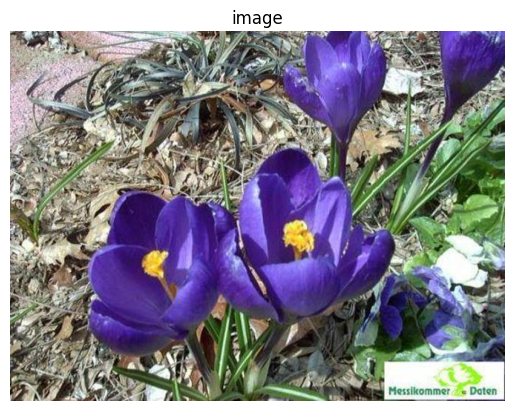

dataset/images/image_sunflower_0089.png
I think this flower is a SUNFLOWER


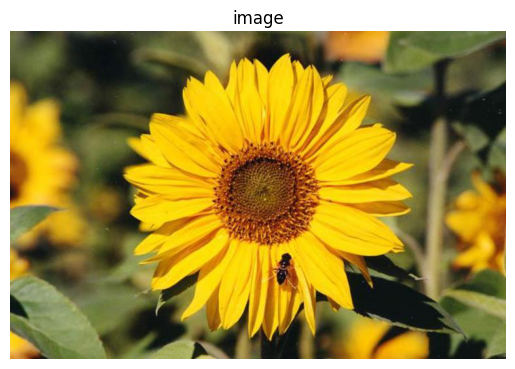

dataset/images/image_crocus_0041.png
I think this flower is a CROCUS


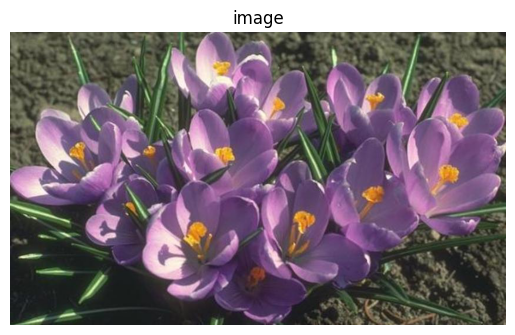

dataset/images/image_crocus_0021.png
I think this flower is a CROCUS


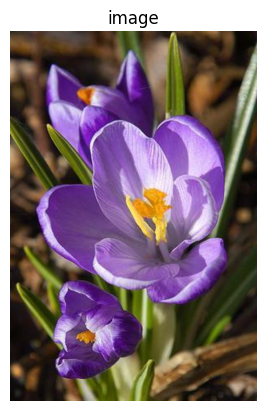

In [1]:
from rgbhistogram import RGBHistogram
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2
import numpy as np
import glob
from helper import draw

imagePaths = sorted(glob.glob("dataset/images/*.png"))
maskPaths = sorted(glob.glob("dataset/masks/*.png"))

data = []
target = []

desc = RGBHistogram([8, 8, 8])

for (imagePath, maskPath) in zip(imagePaths, maskPaths):
    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    features = desc.describe(image, mask)

    data.append(features)
    target.append(imagePath.split("_")[-2])


targetNames = np.unique(target)
le = LabelEncoder()
target = le.fit_transform(target)

(trainData, testData, trainTarget, testTarget) = train_test_split(data, target, 
    test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=25, random_state=84)
model.fit(trainData, trainTarget)

print(classification_report(testTarget, model.predict(testData), target_names = targetNames))

for i in np.random.choice(np.arange(0, len(imagePaths)), 10):
    imagePath = imagePaths[i]
    maskPath = maskPaths[i]

    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    features = desc.describe(image, mask)

    flower = le.inverse_transform(model.predict([features]))[0]
    print(imagePath)
    print("I think this flower is a {}".format(flower.upper()))
    draw("image", image)







Split A foreground object from complex backgrounds with GrabCut Algorithm

h: 686, w: 500


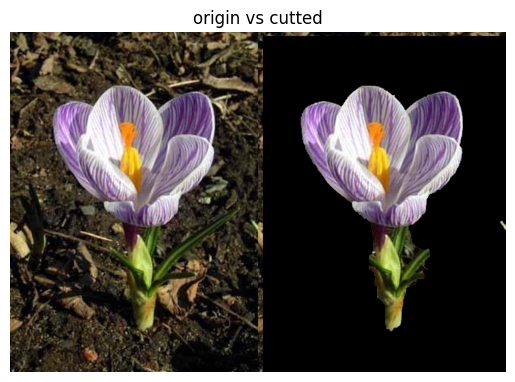

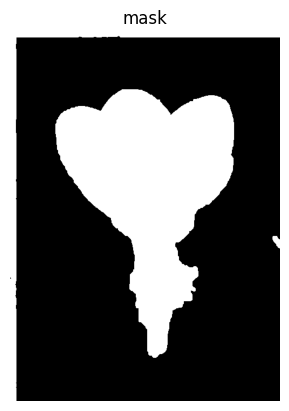

In [18]:
import cv2
import numpy as np
from helper import draw

image = cv2.imread("dataset/images/image_crocus_0001.png")
(h, w) = image.shape[:2]
print("h: {}, w: {}".format(h, w))
mask = np.zeros(image.shape[:2], dtype = "uint8")

bgd = np.zeros((1, 65), dtype="float64")
fgd = np.zeros((1, 65), dtype="float64")

rect = (10, 10, w, h)
cv2.grabCut(image, mask, rect, bgd, fgd, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 1), 0, 1).astype("uint8")
cutted = image * mask2[:, :, np.newaxis]

mask3 = cv2.cvtColor(cutted, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(mask3, (5, 5), 0)
blurred[blurred > 0] = 255

draw("origin vs cutted", np.hstack([image, cutted]))
draw("mask", blurred)
